<a href="https://colab.research.google.com/github/yashusadev/silent_segment_detection/blob/main/SilentSegmentAudioDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project identifies silent parts in an audio file, which can be useful for detecting manipulated or fake audio.

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal

In [5]:
# Load an example audio file
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path)

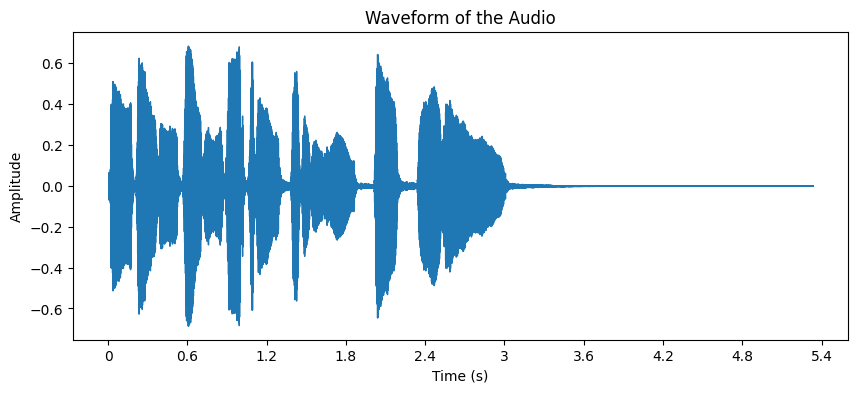

In [6]:
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [7]:
# Compute short-term energy of the signal
frame_length = 1024
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2)) for i in range(0, len(y), hop_length)
])

In [8]:
# Set a threshold to detect silence (adjustable based on dataset)
silence_threshold = np.percentile(energy, 10)  # Bottom 10% energy is considered silence
silent_frames = np.where(energy < silence_threshold)[0]

In [9]:
# Convert to time stamps
silent_times = silent_frames * hop_length / sr

In [10]:
#Displaying the segments
print("Detected Silent Segments (seconds):", silent_times)

Detected Silent Segments (seconds): [4.5046712  4.52789116 4.62077098 4.64399093 4.80653061 4.82975057
 4.85297052 4.87619048 4.89941043 4.92263039 5.03873016 5.06195011
 5.08517007 5.10839002 5.13160998 5.15482993 5.17804989 5.20126984
 5.2244898  5.24770975 5.27092971 5.29414966 5.31736961]
